In [1]:
# try the predicted winner is the team with the greatest avg net Homeruns at home or away (as applicable).


In [2]:
#module

import os
import csv
import pprint
import pandas as pd
import glob
import pprint
import datetime
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
!pwd

files = glob.glob("../datasets/Final_Data_Files/GL*.csv")
files.sort()

def reader(f):
    df = pd.read_csv(f, index_col=False, header=None)  
    df.columns = [("Col_"+str(i)) for i in range(1,df.shape[1]+1)]       

    return df

#season_df = pd.concat([reader(f) for f in files], keys=files)
season_df = pd.concat([reader(f) for f in files])


# season_df

/Users/youngyou/Desktop/baseball-predictor/young


In [3]:
season_df.shape # Useful to make sure we don't loose rows when adding column headers.

(19437, 161)

In [4]:
season_df = season_df.rename(columns={'Col_1':'Date',
                                     'Col_4':'Visiting Team',
                                     'Col_5':'Visiting League',
                                     'Col_7':'Home Team',
                                     'Col_8':'Home League',
                                     'Col_10':'Visiting Score',
                                     'Col_11':'Home Score',
                                     'Col_26':'Visiting Homerun',
                                     'Col_54':'Home Homerun',
                                     'Col_33':'Visiting Strikeout',
                                     'Col_61':'Home Strikeout',
                                      
                                     })
season_df = season_df[['Date', 'Visiting Team', 'Visiting League', 'Home Team', 'Home League',
                       'Visiting Score','Home Score','Visiting Homerun','Home Homerun','Visiting Strikeout','Home Strikeout']]
#season_df

In [5]:
# Identify incomplete rows
season_df.count()

Date                  19437
Visiting Team         19437
Visiting League       19437
Home Team             19437
Home League           19437
Visiting Score        19437
Home Score            19437
Visiting Homerun      19437
Home Homerun          19437
Visiting Strikeout    19437
Home Strikeout        19437
dtype: int64

In [6]:
# Create a column 
season_df['Home Win'] = season_df['Home Score'] > season_df['Visiting Score']
#season_df['V NetRuns'] = season_df['Visiting Score'] - season_df['Home Score']
season_df['V NetHomeruns'] = season_df['Visiting Homerun'] - season_df['Home Homerun']
season_df['H NetHomeruns'] = - season_df['V NetHomeruns']
season_df['V AvgNetHomeruns'] = ""
season_df['H AvgNetHomeruns'] = ""
season_df['Predict Home Wins?'] = ""
season_df['Prediction Correct?'] = ""
season_df['Year'] = season_df['Date'].astype(str).str[:4]

season_df.head()

Date Visiting Team Visiting League Home Team Home League  \
0  20100404           NYA              AL       BOS          AL   
1  20100405           MIN              AL       ANA          AL   
2  20100405           CLE              AL       CHA          AL   
3  20100405           DET              AL       KCA          AL   
4  20100405           SEA              AL       OAK          AL   

   Visiting Score  Home Score  Visiting Homerun  Home Homerun  \
0               7           9                 2             1   
1               3           6                 1             3   
2               0           6                 0             2   
3               8           4                 0             1   
4               5           3                 1             0   

   Visiting Strikeout  Home Strikeout  Home Win  V NetHomeruns  H NetHomeruns  \
0                   2               5      True              1             -1   
1                   8               5      True             -2              2   
2                   7               4      True             -2              2   
3                   9               8     False             -1              1   
4                   8               6     False              1             -1   

  V AvgNetHomeruns H AvgNetHomeruns Predict Home Wins? Prediction Correct?  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            

   Year  
0  2010  
1  2010  
2  2010  
3  2010  
4  2010

In [7]:
win_rate = season_df.groupby('Home Team')['Home Win'].mean()
win_rate.head()

Home Team
ANA    0.550926
ARI    0.515432
ATL    0.554012
BAL    0.561728
BOS    0.540123
Name: Home Win, dtype: float64

In [8]:
sum_season_df = season_df.groupby(['Home Team']).sum()
sum_season_df =sum_season_df.drop('Date', axis=1)
sum_season_df.head()

Visiting Score  Home Score  Visiting Homerun  Home Homerun  \
Home Team                                                               
ANA                  2583        2699               632           635   
ARI                  3061        3096               727           709   
ATL                  2600        2678               548           563   
BAL                  2960        2971               808           922   
BOS                  3032        3338               656           664   

           Visiting Strikeout  Home Strikeout  Home Win  V NetHomeruns  \
Home Team                                                                
ANA                      5117            4360     357.0             -3   
ARI                      5042            5174     334.0             18   
ATL                      5359            4898     359.0            -15   
BAL                      4760            4723     364.0           -114   
BOS                      5250            4599     350.0             -8   

           H NetHomeruns  
Home Team                 
ANA                    3  
ARI                  -18  
ATL                   15  
BAL                  114  
BOS                    8

In [9]:
sum_season_df['Win Rate'] = win_rate
sum_season_df.head()

Visiting Score  Home Score  Visiting Homerun  Home Homerun  \
Home Team                                                               
ANA                  2583        2699               632           635   
ARI                  3061        3096               727           709   
ATL                  2600        2678               548           563   
BAL                  2960        2971               808           922   
BOS                  3032        3338               656           664   

           Visiting Strikeout  Home Strikeout  Home Win  V NetHomeruns  \
Home Team                                                                
ANA                      5117            4360     357.0             -3   
ARI                      5042            5174     334.0             18   
ATL                      5359            4898     359.0            -15   
BAL                      4760            4723     364.0           -114   
BOS                      5250            4599     350.0             -8   

           H NetHomeruns  Win Rate  
Home Team                           
ANA                    3  0.550926  
ARI                  -18  0.515432  
ATL                   15  0.554012  
BAL                  114  0.561728  
BOS                    8  0.540123

Home Homerun  Win Rate
Home Homerun      1.000000  0.413422
Win Rate          0.413422  1.000000

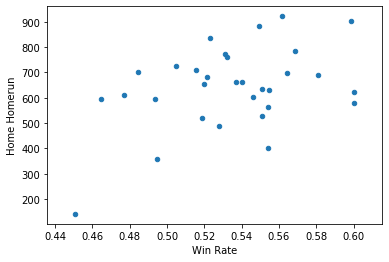

In [10]:
df = sum_season_df[["Home Homerun","Win Rate"]]
df.plot(kind='scatter',x="Win Rate", y="Home Homerun")
df.corr()





Home Strikeout  Win Rate
Home Strikeout        1.000000  0.249299
Win Rate              0.249299  1.000000

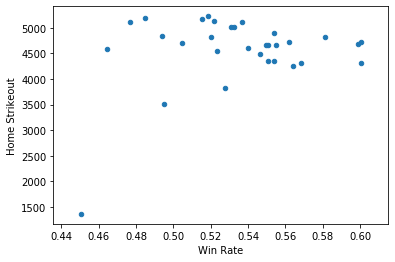

In [11]:
df = sum_season_df[["Home Strikeout","Win Rate"]]
df.plot(kind='scatter',x="Win Rate", y="Home Strikeout")
df.corr()

In [13]:
# Create a dataframe of unique game days with the game ID for the first game

# season_df.head()
gamedays = pd.Series(season_df['Date'].unique())
print(gamedays.head())
print(gamedays.tail())
print(type(gamedays.iloc[0]))

def gamedays_offset(base_date, n): # returns new game date offset by n
    base_date_index = gamedays[gamedays==base_date].index[0]
    if ((n + base_date_index) < 0) or n + base_date_index >= len(gamedays):
        raise ValueError(f"Attempting to caluclate a game date outside the range of the dataset.")
        return(0)  # Out of range
    else:
        new_index = base_date_index + n
#         print(f"new_index={new_index}")
        return gamedays.iloc[new_index]

# This is a manual test of the gamedays_offset() function.
print(gamedays_offset(20120406, -100))
    

0    20100404
1    20100405
2    20100406
3    20100407
4    20100408
dtype: int64
1433    20170927
1434    20170928
1435    20170929
1436    20170930
1437    20171001
dtype: int64
<class 'numpy.int64'>
20110622


In [14]:
# Drop all rows with missing information
season_df = season_df.dropna(how='any')
season_df.count()

Date                   19437
Visiting Team          19437
Visiting League        19437
Home Team              19437
Home League            19437
Visiting Score         19437
Home Score             19437
Visiting Homerun       19437
Home Homerun           19437
Visiting Strikeout     19437
Home Strikeout         19437
Home Win               19437
V NetHomeruns          19437
H NetHomeruns          19437
V AvgNetHomeruns       19437
H AvgNetHomeruns       19437
Predict Home Wins?     19437
Prediction Correct?    19437
Year                   19437
dtype: int64

In [15]:
# sum_season_df =season_df. groupby(['Home Team']).sum()

# sum_season_df.head()

In [16]:
# Ask the user how big of a window of prior game days should we evaluate.
good_value = False
while not good_value:
    lookback_n = int(input(f"How many gamedays back do you want the predictor to look? "))
    good_value = lookback_n > 0 and lookback_n < len(gamedays)

How many gamedays back do you want the predictor to look? 10


In [17]:
dataset_start_date = int(season_df['Date'].min())
start_date = gamedays_offset(dataset_start_date, lookback_n)
end_date = season_df['Date'].max()
print(f"dataset_start_date: {dataset_start_date}")
print(f"start_date: {start_date}")
print(f"end_date: {end_date}")

good_date = False
while not good_date:
    game_day = int(input(f"What is the game day (YYYYMMDD) you want us to predict (between {start_date} and {end_date}: "))
#    game_day = 20100715
    if game_day >= start_date and game_day <= end_date:
        game_day_df = season_df.loc[(season_df['Date'] == (game_day))]
        if len(game_day_df)==0:
            print("Sorry, no games are scheduled for that day")
        else:
            lookback_start_day = gamedays_offset(game_day, -lookback_n)
            lookback_end_day = gamedays_offset(game_day, -1)
            print(f"Lookback window starts {lookback_start_day} - {lookback_end_day}")
            train_df = season_df.loc[((season_df['Date'] < (game_day)) & (season_df['Date'] >= (lookback_start_day)))]
            gds = str(game_day)
            print(f"Nice! There are {len(game_day_df)} games on {gds[0:4]}-{gds[4:6]}-{gds[6:]}.")
            print(f"  We also have {len(train_df)} games in our training set, which should be plenty!")
            good_date = True
    else:
        print("Sorry, the date you selected is outside the range of our dataset.")

train_df.head()

dataset_start_date: 20100404
start_date: 20100414
end_date: 20171001
What is the game day (YYYYMMDD) you want us to predict (between 20100414 and 20171001: 20171001
Lookback window starts 20170921 - 20170930
Nice! There are 15 games on 2017-10-01.
  We also have 138 games in our training set, which should be plenty!


Date Visiting Team Visiting League Home Team Home League  \
2277  20170921           WAS              NL       ATL          NL   
2278  20170921           SLN              NL       CIN          NL   
2279  20170921           CHN              NL       MIL          NL   
2280  20170921           LAN              NL       PHI          NL   
2281  20170921           COL              NL       SDN          NL   

      Visiting Score  Home Score  Visiting Homerun  Home Homerun  \
2277               2           3                 1             0   
2278               8           5                 0             3   
2279               5           3                 2             1   
2280               5           4                 2             1   
2281               0           3                 0             1   

      Visiting Strikeout  Home Strikeout  Home Win  V NetHomeruns  \
2277                   7               7      True              1   
2278                   8              11     False             -3   
2279                   5              11     False              1   
2280                   7              12     False              1   
2281                  12              11      True             -1   

      H NetHomeruns V AvgNetHomeruns H AvgNetHomeruns Predict Home Wins?  \
2277             -1                                                        
2278              3                                                        
2279             -1                                                        
2280             -1                                                        
2281              1                                                        

     Prediction Correct?  Year  
2277                      2017  
2278                      2017  
2279                      2017  
2280                      2017  
2281                      2017

In [18]:
# We now have the set of games we want to predict, and the training set defined.
# game_day_df2 = game_day_df.copy(deep=True)
game_day_df2 = game_day_df.copy(deep=True)
game_day_df2.head()

Date Visiting Team Visiting League Home Team Home League  \
2415  20171001           CIN              NL       CHN          NL   
2416  20171001           LAN              NL       COL          NL   
2417  20171001           ATL              NL       MIA          NL   
2418  20171001           NYN              NL       PHI          NL   
2419  20171001           SDN              NL       SFN          NL   

      Visiting Score  Home Score  Visiting Homerun  Home Homerun  \
2415               3           1                 0             1   
2416               6           3                 0             0   
2417               8           5                 2             1   
2418               0          11                 0             2   
2419               4           5                 1             1   

      Visiting Strikeout  Home Strikeout  Home Win  V NetHomeruns  \
2415                   9               7     False             -1   
2416                   4               7     False              0   
2417                   4              14     False              1   
2418                  11              11      True             -2   
2419                   5               5      True              0   

      H NetHomeruns V AvgNetHomeruns H AvgNetHomeruns Predict Home Wins?  \
2415              1                                                        
2416              0                                                        
2417             -1                                                        
2418              2                                                        
2419              0                                                        

     Prediction Correct?  Year  
2415                      2017  
2416                      2017  
2417                      2017  
2418                      2017  
2419                      2017

In [21]:
#v_teams = game_day_df2['Visiting Team'].to_list()
#v_team_net_score = []
#for team in v_teams:
#    v_team_net_score.append(train_df.loc[(train_df['Visiting Team']==team),:]['V NetRuns'].mean())
#game_day_df2['V AvgNetRuns'] = v_team_net_score

#h_teams = game_day_df2['Home Team'].to_list()
#h_team_net_score = []
#for team in h_teams:
#    h_team_net_score.append(train_df.loc[(train_df['Home Team']==team),:]['H NetRuns'].mean())
#game_day_df2['H AvgNetRuns'] = h_team_net_score

# prediction = [] # True means we predict home wins, False is visitor
# for game in game_day_df2:
#     print(type(game))
#     #prediction.append(game['H AvgNetRuns'] > game['V AvgNetRuns'])
# game_day_df2['Predict Home Wins?'] = prediction

# New Prediction Algorithm
v_team_net_score = []

for hteam, vteam in game_day_df2[['Home Team','Visiting Team']].itertuples(index=False):
    v_team_net_score.append(train_df.loc[(train_df['Visiting Team']==vteam) & (train_df['Home Team']==hteam),:]['V NetHomeruns'].mean())

game_day_df2['V AvgNetHomeruns'] = v_team_net_score


h_team_net_score = []

for hteam, vteam in game_day_df2[['Home Team','Visiting Team']].itertuples(index=False):
    h_team_net_score.append(train_df.loc[(train_df['Home Team']==hteam) & (train_df['Visiting Team']==vteam),:]['H NetHomeruns'].mean())
game_day_df2['H AvgNetHomeruns'] = h_team_net_score
game_day_df2['Predict Home Wins?'] = game_day_df2['H AvgNetHomeruns'] > game_day_df2['V AvgNetHomeruns']

game_day_df2.head()

Date Visiting Team Visiting League Home Team Home League  \
2415  20171001           CIN              NL       CHN          NL   
2416  20171001           LAN              NL       COL          NL   
2417  20171001           ATL              NL       MIA          NL   
2418  20171001           NYN              NL       PHI          NL   
2419  20171001           SDN              NL       SFN          NL   

      Visiting Score  Home Score  Visiting Homerun  Home Homerun  \
2415               3           1                 0             1   
2416               6           3                 0             0   
2417               8           5                 2             1   
2418               0          11                 0             2   
2419               4           5                 1             1   

      Visiting Strikeout  Home Strikeout  Home Win  V NetHomeruns  \
2415                   9               7     False             -1   
2416                   4               7     False              0   
2417                   4              14     False              1   
2418                  11              11      True             -2   
2419                   5               5      True              0   

      H NetHomeruns  V AvgNetHomeruns  H AvgNetHomeruns  Predict Home Wins?  \
2415              1              -1.5               1.5                True   
2416              0              -2.0               2.0                True   
2417             -1               0.0               0.0               False   
2418              2              -0.5               0.5                True   
2419              0               0.5              -0.5               False   

     Prediction Correct?  Year  
2415                      2017  
2416                      2017  
2417                      2017  
2418                      2017  
2419                      2017

In [23]:
# Evaluate the predictions
game_day_df2['Prediction Correct?'] = game_day_df2['Predict Home Wins?'] == game_day_df2['Home Win']
game_day_df2_correct = game_day_df2.loc[(game_day_df2['Prediction Correct?']),:]
print(f"{game_day}: {len(game_day_df2)} games with {len(game_day_df2_correct)} predicted correctly.")
print(f"{round((len(game_day_df2_correct)/len(game_day_df2)*100.),1)}%")
game_day_df2[['Date', 'Visiting Team', 'Home Team', 'Visiting Score', 'Home Score', 'Home Win','Visiting Homerun', 'Home Homerun',
              'V AvgNetHomeruns', 'H AvgNetHomeruns', 'Predict Home Wins?', 'Prediction Correct?']]

20171001: 15 games with 8 predicted correctly.
53.3%


Date Visiting Team Home Team  Visiting Score  Home Score  Home Win  \
2415  20171001           CIN       CHN               3           1     False   
2416  20171001           LAN       COL               6           3     False   
2417  20171001           ATL       MIA               8           5     False   
2418  20171001           NYN       PHI               0          11      True   
2419  20171001           SDN       SFN               4           5      True   
2420  20171001           MIL       SLN               6           1     False   
2421  20171001           PIT       WAS              11           8     False   
2422  20171001           SEA       ANA               2           6      True   
2423  20171001           HOU       BOS               4           3     False   
2424  20171001           CHA       CLE               1           3      True   
2425  20171001           ARI       KCA              14           2     False   
2426  20171001           DET       MIN               1           5      True   
2427  20171001           TOR       NYA               2           1     False   
2428  20171001           BAL       TBA               0           6      True   
2429  20171001           OAK       TEX               5           2     False   

      Visiting Homerun  Home Homerun  V AvgNetHomeruns  H AvgNetHomeruns  \
2415                 0             1         -1.500000          1.500000   
2416                 0             0         -2.000000          2.000000   
2417                 2             1          0.000000          0.000000   
2418                 0             2         -0.500000          0.500000   
2419                 1             1          0.500000         -0.500000   
2420                 2             1          0.000000          0.000000   
2421                 0             2         -0.666667          0.666667   
2422                 1             1          1.500000         -1.500000   
2423                 0             0          1.000000         -1.000000   
2424                 1             0          0.000000          0.000000   
2425                 2             1          0.000000          0.000000   
2426                 1             2         -0.500000          0.500000   
2427                 0             1         -0.500000          0.500000   
2428                 0             1         -1.500000          1.500000   
2429                 1             0          0.333333         -0.333333   

      Predict Home Wins?  Prediction Correct?  
2415                True                False  
2416                True                False  
2417               False                 True  
2418                True                 True  
2419               False                False  
2420               False                 True  
2421                True                False  
2422               False                False  
2423               False                 True  
2424               False                False  
2425               False                 True  
2426                True                 True  
2427                True                False  
2428                True                 True  
2429               False                 True

In [25]:
# df=game_day_df2[["Home Homerun","H NetHomeruns"]]
# df.plot(kind='scatter',x="H NetHomeruns", y="Home Homerun")